# 1 : Problem Statement 

### Predict The Marks Of Students On The Basis Of Student Study In Hours

In [54]:
### Import Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# 2 : Data Gathering

In [6]:
df=pd.read_csv(r"C:\Users\CHETAK\Downloads\student_info.csv")
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


# 3: EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
df.isna().sum()

study_hours      5
student_marks    0
dtype: int64

In [ ]:
# means we have some 5 null values we have  to fill null values

In [9]:
df.shape

(200, 2)

In [10]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


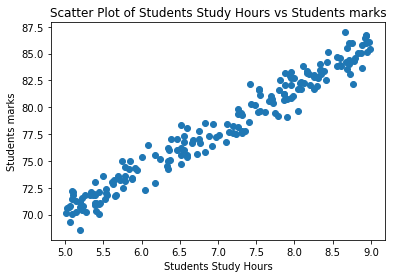

In [11]:
plt.scatter(x =df['study_hours'], y = df['student_marks'])
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

# 4: Feature Engg

In [12]:
df['study_hours']

0      6.83
1      6.56
2       NaN
3      5.67
4      8.67
       ... 
195    7.53
196    8.56
197    8.94
198    6.60
199    8.35
Name: study_hours, Length: 200, dtype: float64

In [13]:
df['study_hours'].mean()

6.9959487179487185

In [14]:
df['study_hours'].fillna(df['study_hours'].mean(), inplace=True)


In [15]:
df.isna().sum()

study_hours      0
student_marks    0
dtype: int64

In [ ]:
# now we dont have any null values and our whole data is in numeric 
# so we can train our model

# 5 : Feature Selection

In [16]:
x=df[['study_hours']]
y=df[['student_marks']]

In [60]:
x.shape

(200, 1)

# 6 : Model Training

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 23)

In [18]:
x_train

,study_hours
47,5.010000
10,6.590000
172,7.350000
44,8.090000
128,6.380000
...,...
91,8.200000
31,6.995949
182,8.660000
40,5.280000


In [19]:
x_test.head()

,study_hours
72,6.350000
30,8.130000
188,6.995949
77,6.560000
14,8.190000


In [20]:
lr = LinearRegression()


In [21]:
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
lr.coef_

array([[3.87826409]])

In [23]:
lr.intercept_

array([50.81817016])

In [24]:
m = 3.83
c = 50.81
y  = m * 4 + c 
y

66.13

In [25]:
lr.predict([[4]])

C:\Users\CHETAK\ana\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[66.33122651]])

In [26]:
y_pred  = lr.predict(x_test)
y_pred

array([[75.44514711],
       [82.34845718],
       [77.95030682],
       [76.25958257],
       [82.58115303],
       [76.41471313],
       [70.98514341],
       [80.5644557 ],
       [76.41471313],
       [71.72201358],
       [82.03819605],
       [74.24288524],
       [78.0048014 ],
       [81.611587  ],
       [71.06270869],
       [83.20167528],
       [74.78584221],
       [71.95470943],
       [71.91592679],
       [84.1712413 ],
       [71.72201358],
       [84.59785035],
       [76.99645274],
       [85.06324204],
       [77.30671387],
       [81.65036965],
       [71.72201358],
       [77.69454028],
       [79.16828063],
       [76.64740897],
       [71.21783925],
       [83.43437112],
       [70.48096908],
       [73.00184073],
       [79.63367232],
       [82.85263151],
       [70.94636077],
       [78.70288894],
       [79.59488968],
       [75.87175616]])

In [27]:
pd.DataFrame(np.c_[x_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,6.350000,74.97,75.445147
1,8.130000,82.27,82.348457
2,6.995949,77.27,77.950307
3,6.560000,77.33,76.259583
4,8.190000,83.08,82.581153
5,6.600000,75.55,76.414713
6,5.200000,68.57,70.985143
7,7.670000,80.58,80.564456
8,6.600000,78.05,76.414713
9,5.390000,73.02,71.722014


# 7 : Model Evalution

### Testing Data Evalution

In [28]:
y_pred_test = lr.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print(f"{mse=}")

rmse = np.sqrt(mse)
print(f'RMSE={rmse}')

r2 = r2_score(y_test,y_pred_test)
print(f"R sequared ={r2}")

adj_r2 = 1 - ( ((1-r2) * (len(x_test)-1)) /  (len(x_test)-len(x.columns)-1 ))
print(f"Adjusted R- Sequared = {adj_r2}")

# mean_absolte_error = sum |(y_pred - y_actual )|/ n

mae = mean_absolute_error(y_test,y_pred_test)
print(f'MAE = {mae}')

mse=1.0982950237570093
RMSE=1.0479957174325711
R sequared =0.9502996975357364
Adjusted R- Sequared = 0.9489917948393084
MAE = 0.8051265085537181


### Training Data Evalution

In [29]:
y_pred_train = lr.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print(f"{mse=}")

rmse = np.sqrt(mse)
print(f'RMSE={rmse}')

r2 = r2_score(y_train,y_pred_train)
print(f"R sequared ={r2}")

adj_r2 = 1 - ( ((1-r2) * (len(x_test)-1)) /  (len(x_test)-len(x.columns)-1 ))
print(f"Adjusted R- Sequared = {adj_r2}")

# mean_absolte_error = sum |(y_pred - y_actual )|/ n

mae = mean_absolute_error(y_train,y_pred_train)
print(f'MAE = {mae}')

mse=0.9984876600945298
RMSE=0.9992435439343753
R sequared =0.959230863687595
Adjusted R- Sequared = 0.9581579916793739
MAE = 0.8066857055938328


In [30]:
lr.score(x_test,y_test)

0.9502996975357364

In [ ]:
Training Acc >> 95%
Testing Acc >> 94%

Bias > low Bias
Varaince >> low Variance


-------- Generlise Model---------

### Some Visualisation

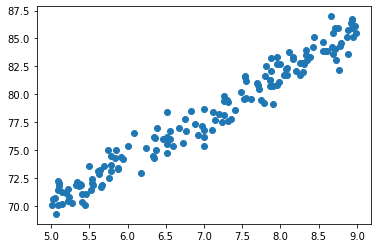

In [31]:
plt.scatter(x_train,y_train)

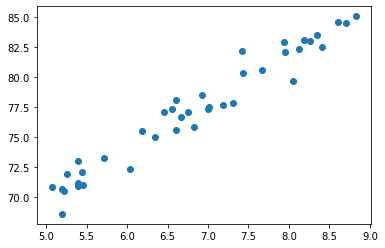

In [32]:
plt.scatter(x_test, y_test)


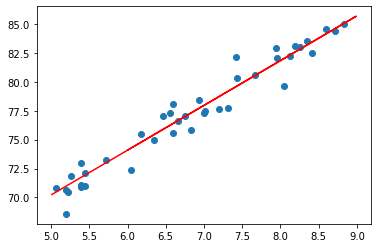

In [33]:
plt.scatter(x_test, y_test)
plt.plot(x_train, lr.predict(x_train), color = "r")

### Making User Input 

In [42]:
import numpy as np
def user_input():
    study = int(input("student study in hours -:"))
    
    user_data = np.zeros(1)
    
    user_data[0] = study
    
    
    res = lr.predict([user_data])
    print("on the basis of student study in hours his predicted marks are -:",res)
    
# user_input()  

In [43]:
user_input()

student study in hours -:7
on the basis of student study in hours his predicted marks are -: [[77.96601876]]


C:\Users\CHETAK\ana\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 8 : Deployment Of Model

In [44]:
import pickle

In [66]:
with open('students_marks_prediction_linearR','wb') as model_file:
     pickle.dump(lr,model_file)

In [67]:
with open('students_marks_prediction_linearR','rb') as model_file:
     model=pickle.load(model_file)

In [68]:
model.coef_

array([[3.87826409]])

In [69]:
model.intercept_

array([50.81817016])

In [70]:
model.predict([[8]])

C:\Users\CHETAK\ana\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[81.84428285]])